# **Twitter Sentiment Analysis: Public Perception of Generative AI Art**

## **Twitter Data Scraping**

Data is scraped with [twitterapi.io](https://twitterapi.io)\
By Muhammad Zydan Priambada

In [1]:
# REPLACE THIS WITH YOUR OWN API KEY
from google.colab import userdata
TWITTERAPI_KEY = userdata.get('TWITTERAPI_KEY')

In [ ]:
import time
import json
import requests

# Define the query
query = "AI art"
encoded_query = query.replace(" ", "%20")

# query up to 50 page with cursor pagination
page = 50
cursor = ""
response_list = [] # Initialize response_list to store all responses
for i in range(page):
  time.sleep(5)
  if cursor == "":
    url = f"https://api.twitterapi.io/twitter/tweet/advanced_search?queryType=Top&query={encoded_query}"
  else:
    url = f"https://api.twitterapi.io/twitter/tweet/advanced_search?queryType=Top&cursor={cursor}&query={encoded_query}"

  headers = {"X-API-Key": TWITTERAPI_KEY}

  response = requests.get(url, headers=headers)
  response_data = response.json()
  response_list.append(response_data) # Append each response data to the list
  # if no cursor left break the loop
  if not response_data["has_next_page"]:
    break
  # get cursor
  cursor = response_data["next_cursor"]


The JSON response is then converted into pandas dataframe, and saved to .csv file

In [ ]:
import pandas as pd

all_tweets = []

for response_data in response_list:
    # Check if 'tweets' key exists and is a list to avoid errors from failed API calls
    if 'tweets' in response_data and isinstance(response_data['tweets'], list):
        all_tweets.extend(response_data['tweets'])

# Create a DataFrame from the collected tweets
tweets_df = pd.DataFrame(all_tweets)

tweets_df

,type,id,url,twitterUrl,text,source,retweetCount,replyCount,likeCount,quoteCount,...,inReplyToUserId,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet,article
0,tweet,1999851805761765811,https://x.com/MeSOutk1/status/1999851805761765811,https://twitter.com/MeSOutk1/status/1999851805...,The only AI art I would tolerate.\n\n#TheAmazi...,Twitter for iPhone,2989,37,30431,10,...,None,None,"{'type': 'user', 'userName': 'MeSOutk1', 'url'...",{'media': [{'display_url': 'pic.x.com/fUVZUZzf...,None,{},"{'hashtags': [{'indices': [35, 59], 'text': 'T...",None,None,None
1,tweet,1951096888972943759,https://x.com/premium/status/1951096888972943759,https://twitter.com/premium/status/19510968889...,لماذا تخمّن عندما يمكنك أن تعرف؟,Twitter for iPhone,276,0,2647,17,...,None,None,"{'type': 'user', 'userName': 'premium', 'url':...",{},"{'binding_values': [{'key': 'unified_card', 'v...",{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",None,None,None
2,tweet,2000297045286940676,https://x.com/iamrollandex/status/200029704528...,https://twitter.com/iamrollandex/status/200029...,15 AI tools you’ll actually use:\n\n1. https:/...,Twitter for iPhone,124,11,523,4,...,None,None,"{'type': 'user', 'userName': 'iamrollandex', '...",{'media': [{'display_url': 'pic.x.com/0cYjcJu6...,None,{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",None,None,None
3,tweet,2000250640006787298,https://x.com/sackboydaily/status/200025064000...,https://twitter.com/sackboydaily/status/200025...,saw someone use ai to make anti-ai art https:/...,Twitter for iPhone,4436,67,57752,45,...,None,None,"{'type': 'user', 'userName': 'sackboydaily', '...",{'media': [{'display_url': 'pic.x.com/K6VB4HRu...,None,{},"{'hashtags': [], 'media': [{'display_url': 'pi...",None,None,None
4,tweet,1991299065624326310,https://x.com/caffeineai/status/19912990656243...,https://twitter.com/caffeineai/status/19912990...,Showcase your portfolio in style. Chat with Ca...,Twitter for iPhone,124,67,1657,4,...,None,None,"{'type': 'user', 'userName': 'caffeineai', 'ur...",{},"{'binding_values': [{'key': 'unified_card', 'v...",{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,tweet,2000401047676932181,https://x.com/AzureLionProd/status/20004010476...,https://twitter.com/AzureLionProd/status/20004...,AI is an image-generating slot machine or roul...,Twitter for iPhone,0,0,0,0,...,None,None,"{'type': 'user', 'userName': 'AzureLionProd', ...",{'media': [{'display_url': 'pic.x.com/gvF30ORO...,None,{},"{'hashtags': [], 'media': [{'display_url': 'pi...",None,None,None
974,tweet,1999423811889017181,https://x.com/AnkerOfficial/status/19994238118...,https://twitter.com/AnkerOfficial/status/19994...,The World's First 25W Wireless Charger with Ac...,Twitter for iPhone,0,0,0,0,...,None,None,"{'type': 'user', 'userName': 'AnkerOfficial', ...",{},"{'binding_values': [{'key': 'unified_card', 'v...",{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",None,None,None
975,tweet,1999799465331552687,https://x.com/AI_art_bird/status/1999799465331...,https://twitter.com/AI_art_bird/status/1999799...,"💚❤️💚♥💚♥💚♥💚♥💚\n\nHey, Good work today🩷🩷🩷\n\npre...",Twitter for iPhone,156,7,2067,1,...,None,None,"{'type': 'user', 'userName': 'AI_art_bird', 'u...",{'media': [{'display_url': 'pic.x.com/TjBo7OR8...,None,{},"{'hashtags': [{'indices': [155, 162], 'text': ...","{'type': 'tweet', 'id': '1999665070327103779',...",None,None
976,tweet,1998384833110892753,https://x.com/pbr_1472/status/1998384833110892753,https://twitter.com/pbr_1472/status/1998384833...,BRASS STREETS OF NEW YORK CITY🛹 \n(Part 5 of S...,Twitter for iPhone,0,0,19,0,...,None,None,"{'type': 'user', 'userName': 'pbr_1472', 'url'...",{'media': [{'display_url': 'pic.x.com/KcyDnPSa...,None,{},"{'hashtags': [{'indices': [127, 145], 'text': ...",None,None,None


In [ ]:
# save the dataframe to .csv with semicolon delimiter
tweets_df.to_csv("tweets_top.csv", sep=";")

## **Data Cleaning**

The scraped tweets have a lot of unwanted tweets that can be clean, that includes:

1.   Duplicates & Bots
2.   Noises for Engagement farming (NFT/Crypto spam etc.)
3.   Irrelevant tweets





In [4]:
import pandas as pd
tweets_df = pd.read_csv("tweets_top.csv", sep=";")
tweets_df

,Unnamed: 0,type,id,url,twitterUrl,text,source,retweetCount,replyCount,likeCount,...,inReplyToUserId,inReplyToUsername,author,extendedEntities,card,place,entities,quoted_tweet,retweeted_tweet,article
0,0,tweet,1999851805761765811,https://x.com/MeSOutk1/status/1999851805761765811,https://twitter.com/MeSOutk1/status/1999851805...,The only AI art I would tolerate.\n\n#TheAmazi...,Twitter for iPhone,2989,37,30431,...,NaN,NaN,"{'type': 'user', 'userName': 'MeSOutk1', 'url'...",{'media': [{'display_url': 'pic.x.com/fUVZUZzf...,NaN,{},"{'hashtags': [{'indices': [35, 59], 'text': 'T...",NaN,NaN,NaN
1,1,tweet,1951096888972943759,https://x.com/premium/status/1951096888972943759,https://twitter.com/premium/status/19510968889...,لماذا تخمّن عندما يمكنك أن تعرف؟,Twitter for iPhone,276,0,2647,...,NaN,NaN,"{'type': 'user', 'userName': 'premium', 'url':...",{},"{'binding_values': [{'key': 'unified_card', 'v...",{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",NaN,NaN,NaN
2,2,tweet,2000297045286940676,https://x.com/iamrollandex/status/200029704528...,https://twitter.com/iamrollandex/status/200029...,15 AI tools you’ll actually use:\n\n1. https:/...,Twitter for iPhone,124,11,523,...,NaN,NaN,"{'type': 'user', 'userName': 'iamrollandex', '...",{'media': [{'display_url': 'pic.x.com/0cYjcJu6...,NaN,{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",NaN,NaN,NaN
3,3,tweet,2000250640006787298,https://x.com/sackboydaily/status/200025064000...,https://twitter.com/sackboydaily/status/200025...,saw someone use ai to make anti-ai art https:/...,Twitter for iPhone,4436,67,57752,...,NaN,NaN,"{'type': 'user', 'userName': 'sackboydaily', '...",{'media': [{'display_url': 'pic.x.com/K6VB4HRu...,NaN,{},"{'hashtags': [], 'media': [{'display_url': 'pi...",NaN,NaN,NaN
4,4,tweet,1991299065624326310,https://x.com/caffeineai/status/19912990656243...,https://twitter.com/caffeineai/status/19912990...,Showcase your portfolio in style. Chat with Ca...,Twitter for iPhone,124,67,1657,...,NaN,NaN,"{'type': 'user', 'userName': 'caffeineai', 'ur...",{},"{'binding_values': [{'key': 'unified_card', 'v...",{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,973,tweet,2000401047676932181,https://x.com/AzureLionProd/status/20004010476...,https://twitter.com/AzureLionProd/status/20004...,AI is an image-generating slot machine or roul...,Twitter for iPhone,0,0,0,...,NaN,NaN,"{'type': 'user', 'userName': 'AzureLionProd', ...",{'media': [{'display_url': 'pic.x.com/gvF30ORO...,NaN,{},"{'hashtags': [], 'media': [{'display_url': 'pi...",NaN,NaN,NaN
974,974,tweet,1999423811889017181,https://x.com/AnkerOfficial/status/19994238118...,https://twitter.com/AnkerOfficial/status/19994...,The World's First 25W Wireless Charger with Ac...,Twitter for iPhone,0,0,0,...,NaN,NaN,"{'type': 'user', 'userName': 'AnkerOfficial', ...",{},"{'binding_values': [{'key': 'unified_card', 'v...",{},"{'hashtags': [], 'symbols': [], 'timestamps': ...",NaN,NaN,NaN
975,975,tweet,1999799465331552687,https://x.com/AI_art_bird/status/1999799465331...,https://twitter.com/AI_art_bird/status/1999799...,"💚❤️💚♥💚♥💚♥💚♥💚\n\nHey, Good work today🩷🩷🩷\n\npre...",Twitter for iPhone,156,7,2067,...,NaN,NaN,"{'type': 'user', 'userName': 'AI_art_bird', 'u...",{'media': [{'display_url': 'pic.x.com/TjBo7OR8...,NaN,{},"{'hashtags': [{'indices': [155, 162], 'text': ...","{'type': 'tweet', 'id': '1999665070327103779',...",NaN,NaN
976,976,tweet,1998384833110892753,https://x.com/pbr_1472/status/1998384833110892753,https://twitter.com/pbr_1472/status/1998384833...,BRASS STREETS OF NEW YORK CITY🛹 \n(Part 5 of S...,Twitter for iPhone,0,0,19,...,NaN,NaN,"{'type': 'user', 'userName': 'pbr_1472', 'url'...",{'media': [{'display_url': 'pic.x.com/KcyDnPSa...,NaN,{},"{'hashtags': [{'indices': [127, 145], 'text': ...",NaN,NaN,NaN


In [5]:
# DATA CLEANING
from sentence_transformers import SentenceTransformer, util

tweets_clean = tweets_df
# removing duplicates
tweets_clean = tweets_clean.drop_duplicates(subset=['text'])
# keyword filtering
noise_keywords = ['nft', 'mint', 'crypto', 'giveaway', 'wallet', 'opensea']
pattern = '|'.join(noise_keywords)
tweets_clean = tweets_clean[~tweets_clean['text'].str.contains(pattern, case=False, na=False)]

# semantic filtering
model = SentenceTransformer('all-MiniLM-L6-v2')
anchor_text = "Opinions, ethics, and discussions about AI generated art and tools like Midjourney, DALL-E, Sora"\

# Encode the anchor and the tweets
anchor_embedding = model.encode(anchor_text, convert_to_tensor=True)
tweet_embeddings = model.encode(tweets_clean['text'].tolist(), convert_to_tensor=True)

# Compute cosine similarity between the anchor and the tweets
cosine_scores = util.cos_sim(anchor_embedding, tweet_embeddings)[0]

# add score
tweets_clean['relevance_score'] = cosine_scores.cpu().numpy()

final_tweets = tweets_clean[tweets_clean['relevance_score'] > 0.3]

# compare the rows
print(len(tweets_df))
print(len(final_tweets))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

978
516


## **roBERTa Sentiment Analysis**

roBERTa model is used because it is trained from over 58M tweets which results in a more accurate sentiment labeling on tweets.

source: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

In [7]:
# preprocess function
def tweet_preprocess(tweet):
  tweet_words = []
  for word in tweet.split(' '):
    word = "@user" if word.startswith('@') and len(word) > 1 else word
    word = "http" if word.startswith('http') else word
    tweet_words.append(word)

  #limit
  return ' '.join(tweet_words)

Initiate roBERTa model

In [8]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [9]:
# download label mapping
import csv
import urllib.request

labels=[]
mapping_link = "https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
print(labels)

['negative', 'neutral', 'positive']


Create a sentiment labeling function from text

In [10]:
def get_roberta_sentiment(tweet):
  text = tweet_preprocess(tweet)
  encoded_input = tokenizer(
      text,
      max_length=512,          # Specifies the maximum total length of the sequence
      truncation=True,        # Enables truncation if the text is longer than max_length
      padding='max_length',
      return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  # label
  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    #print(f"{i+1}) {l} {np.round(float(s), 4)}")
  top_label = labels[ranking[0]]
  top_score = float(scores[ranking[0]])
  return top_label, top_score

In [11]:
tweets = final_tweets.loc[:, ["url","text","likeCount"]]
tweets

,url,text,likeCount
0,https://x.com/MeSOutk1/status/1999851805761765811,The only AI art I would tolerate.\n\n#TheAmazi...,30431
2,https://x.com/iamrollandex/status/200029704528...,15 AI tools you’ll actually use:\n\n1. https:/...,523
3,https://x.com/sackboydaily/status/200025064000...,saw someone use ai to make anti-ai art https:/...,57752
5,https://x.com/Jesperish/status/199910978295583...,"Art I made back when ""AI"" meant Adobe Illustra...",68598
6,https://x.com/blac_ai/status/2000282391584125145,art i made this week https://t.co/qGHwC957Dp,1828
...,...,...,...
969,https://x.com/GPrime85/status/2001086643210441213,“You sound like a Leftoid hating AI”\n\nI agre...,1619
971,https://x.com/PoposhiRat/status/20010466963069...,Devs tried to put an anti-AI stance just to fo...,12311
972,https://x.com/UltraPixelStud/status/1999762121...,✨ Just dropped a new AI artwork ✨ Every detail...,4
973,https://x.com/AzureLionProd/status/20004010476...,AI is an image-generating slot machine or roul...,0


Run the function through all tweets

In [12]:
tweets[["sentiment","confidence"]] = tweets["text"].apply(
    lambda x: pd.Series(get_roberta_sentiment(x))
)
tweets

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

,url,text,likeCount,sentiment,confidence
0,https://x.com/MeSOutk1/status/1999851805761765811,The only AI art I would tolerate.\n\n#TheAmazi...,30431,positive,0.528782
2,https://x.com/iamrollandex/status/200029704528...,15 AI tools you’ll actually use:\n\n1. https:/...,523,neutral,0.659517
3,https://x.com/sackboydaily/status/200025064000...,saw someone use ai to make anti-ai art https:/...,57752,neutral,0.511747
5,https://x.com/Jesperish/status/199910978295583...,"Art I made back when ""AI"" meant Adobe Illustra...",68598,neutral,0.709586
6,https://x.com/blac_ai/status/2000282391584125145,art i made this week https://t.co/qGHwC957Dp,1828,neutral,0.801288
...,...,...,...,...,...
969,https://x.com/GPrime85/status/2001086643210441213,“You sound like a Leftoid hating AI”\n\nI agre...,1619,negative,0.862980
971,https://x.com/PoposhiRat/status/20010466963069...,Devs tried to put an anti-AI stance just to fo...,12311,neutral,0.492502
972,https://x.com/UltraPixelStud/status/1999762121...,✨ Just dropped a new AI artwork ✨ Every detail...,4,positive,0.504030
973,https://x.com/AzureLionProd/status/20004010476...,AI is an image-generating slot machine or roul...,0,neutral,0.571998


Add a weighted sentiment by tweet like count

In [13]:
tweets['engagement_log'] = np.log1p(tweets['likeCount'])

sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
tweets['sentiment_score'] = tweets['sentiment'].map(sentiment_map)

tweets['weighted_sentiment'] = tweets['sentiment_score'] * tweets['engagement_log'] * tweets['confidence']
# sort df by likecount
tweets = tweets.sort_values(by='likeCount', ascending=False)
tweets

,url,text,likeCount,sentiment,confidence,engagement_log,sentiment_score,weighted_sentiment
10,https://x.com/No_honey_art/status/200002542572...,As a person with disability I say fuck ai http...,320863,negative,0.923728,12.678773,-1,-11.711739
59,https://x.com/briscoepark/status/1974953511264...,interact with this post if you dislike ai art,207950,negative,0.785096,12.245058,-1,-9.613551
26,https://x.com/lukewarmcoco4/status/20002767953...,Deadass sonic fetish porn has more artistic in...,182418,negative,0.845981,12.114062,-1,-10.248266
60,https://x.com/Velinxi/status/1934646648249987295,This AI “artist” tried to block me so I wouldn...,97359,negative,0.766825,11.486171,-1,-8.807880
5,https://x.com/Jesperish/status/199910978295583...,"Art I made back when ""AI"" meant Adobe Illustra...",68598,neutral,0.709586,11.136033,0,0.000000
...,...,...,...,...,...,...,...,...
510,https://x.com/dataedgeusa/status/2000540704121...,When AI Became an Artist 🎨🤖\n.\n.\n.\n#aiart #...,0,positive,0.496508,0.000000,1,0.000000
511,https://x.com/AustinDahu/status/19996491304368...,@Nonukeforpeace @Eivor_Koy Art is learnable. A...,0,neutral,0.584258,0.000000,0,0.000000
465,https://x.com/StableArtAI/status/2002053063880...,reference image to full dance choreography @gr...,0,positive,0.893259,0.000000,1,0.000000
415,https://x.com/staronline/status/19087842920895...,"""Only humans can combine feelings and words an...",0,negative,0.738934,0.000000,-1,-0.000000


Sentiment Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment
neutral     237
negative    164
positive    115
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7cd750da4c50>,
 [Text(-1.0910213820191867, 0.1402581333718093, 'neutral'),
  Text(0.7439718629078238, -0.8102504965758813, 'negative'),
  Text(0.7087750006807825, 0.8412122196033276, 'positive')],
 [Text(-0.5951025720104653, 0.07650443638462325, '45.9%'),
  Text(0.4058028343133584, -0.4419548163141171, '31.8%'),
  Text(0.3866045458258813, 0.45884302887454226, '22.3%')])

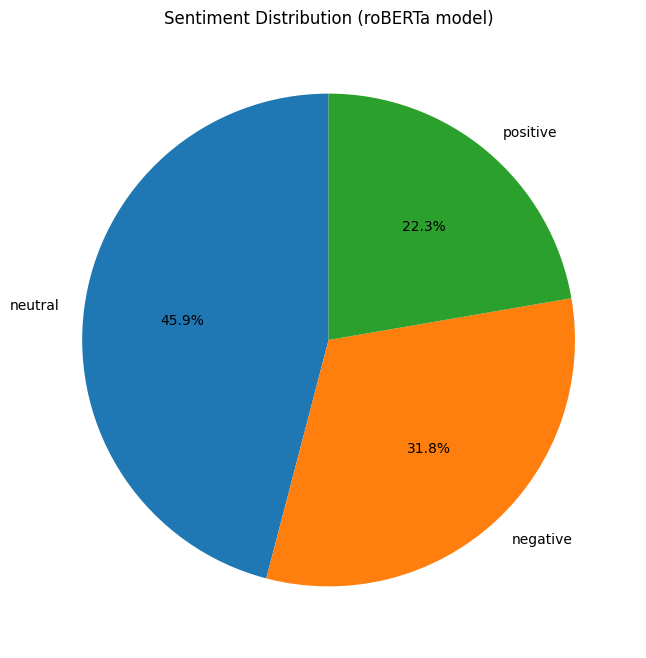

In [15]:
#visualize sentiment in pie chart
import matplotlib.pyplot as plt

sentiment_counts = tweets["sentiment"].value_counts()
print(sentiment_counts)
plt.figure(figsize=(8, 8))
plt.title("Sentiment Distribution (roBERTa model)")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

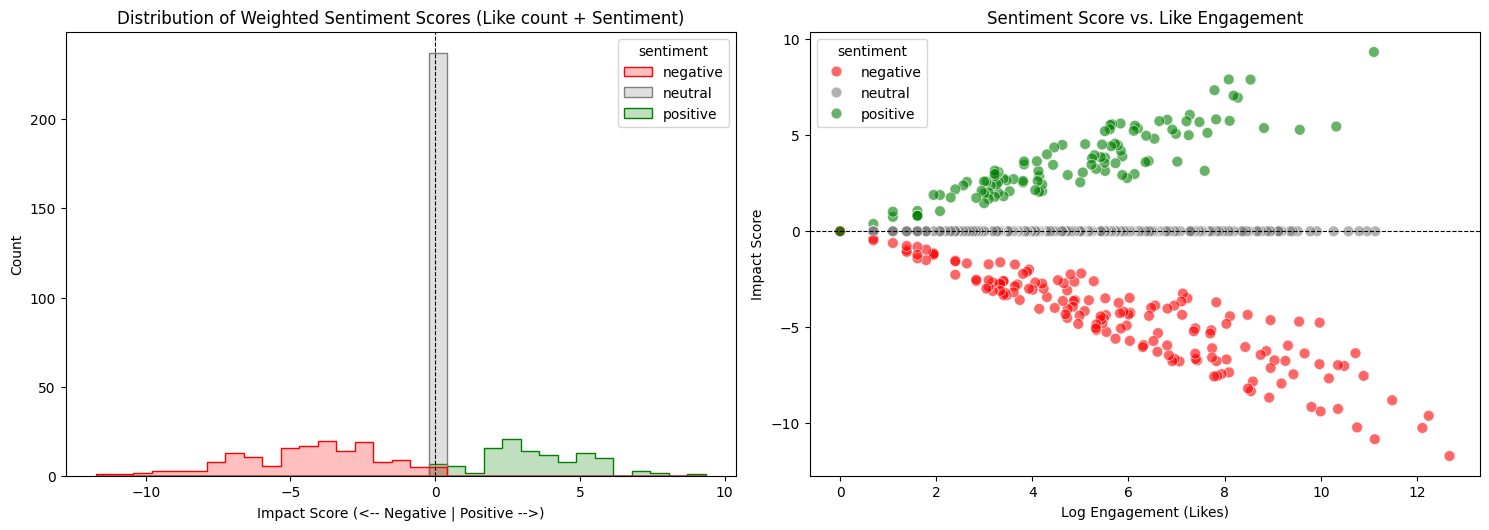

In [16]:
# --- PLOT 1: The "Polarization" Check (Histogram) ---
# Shows if your conversation is balanced or dominated by one side

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(
    data=tweets,
    x='weighted_sentiment',
    hue='sentiment',
    element='step',
    palette={'positive': 'green', 'negative': 'red', 'neutral': 'gray'}
)
plt.title('Distribution of Weighted Sentiment Scores (Like count + Sentiment)')
plt.xlabel('Impact Score (<-- Negative | Positive -->)')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

# --- PLOT 2: The "Virality" Quadrant (Scatter) ---
# Shows the correlation between Engagement and Impact
plt.subplot(2, 2, 2)
sns.scatterplot(
    data=tweets,
    x='engagement_log',
    y='weighted_sentiment',
    hue='sentiment',
    palette={'positive': 'green', 'negative': 'red', 'neutral': 'gray'},
    alpha=0.6,
    s=60
)
plt.title('Sentiment Score vs. Like Engagement')
plt.xlabel('Log Engagement (Likes)')
plt.ylabel('Impact Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# --- PLOT 3: The "Top Influencers" (Bar Chart) ---
# Identifies the specific tweets driving the conversation
# Get top 10 by absolute impact
tweets['abs_impact'] = tweets['weighted_sentiment'].abs()
top_tweets = tweets.sort_values('abs_impact', ascending=False).head(10)

plt.tight_layout()
plt.savefig('impact_analysis.png')

Reference:\
Barbieri, F., Camacho-Collados, J., Espinosa Anke, L., & Neves, L. (2020, November). TweetEval: Unified Benchmark and Comparative Evaluation for Tweet Classification. Findings of the Association for Computational Linguistics: EMNLP 2020, 1644–1650. doi:10.18653/v1/2020.findings-emnlp.148